In [56]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Przygotowanie danych + Wizualizacja

Załadowanie zbioru danych i podział na zbiory testowy/treningowy. Wizualizacja po redukcji wymiarowości T-SNE

In [2]:
df = pd.read_csv("dataset/diabetes.csv")

In [32]:
y_cols = ["Outcome"]
feature_cols = df.columns.difference(y_cols)
X = df[feature_cols].values
y = df[y_cols].values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X).astype(np.float32)
X_normalized.shape, y.shape


((768, 8), (768, 1))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=2138)

In [5]:
# 2dim T-SNE
tsne = TSNE(n_components=2)
vis_points = tsne.fit_transform(X_train)

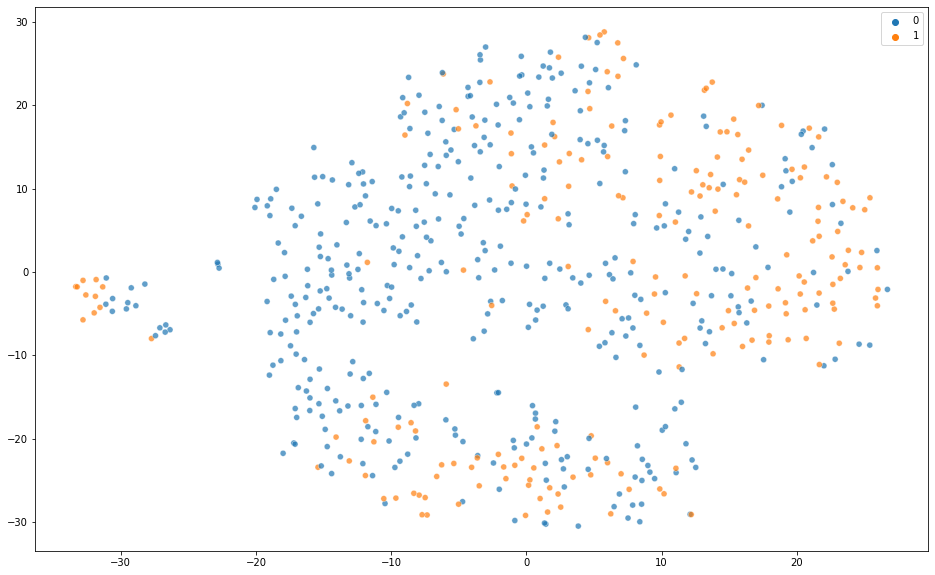

In [6]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=vis_points[:,0], y=vis_points[:,1], hue=y_train.ravel(), legend="full", alpha=0.7
)
plt.show()

In [7]:
# 3dim T-SNE
tsne = TSNE(n_components=3)
vis_points = tsne.fit_transform(X_train)

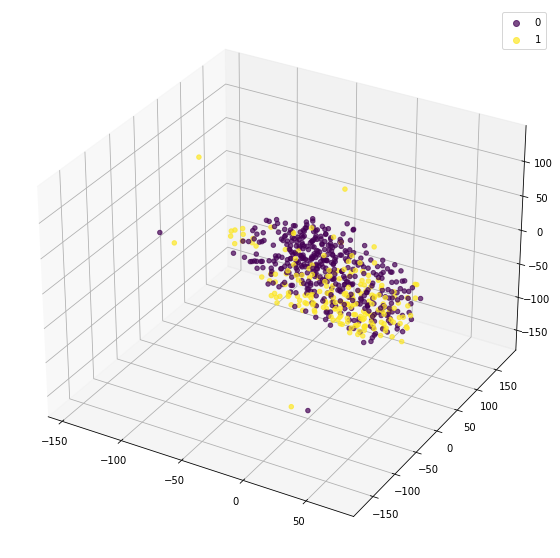

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(vis_points[:, 0], vis_points[:, 1], vis_points[:, 2], c=y_train, marker='o', alpha=0.7)
plt.legend(*sc.legend_elements())
plt.show()

## GMM test run

In [42]:
from gmm import GaussianMixtureModel

  0%|          | 0/50 [00:00<?, ?it/s]

Log likelihood not increasing, stopping.


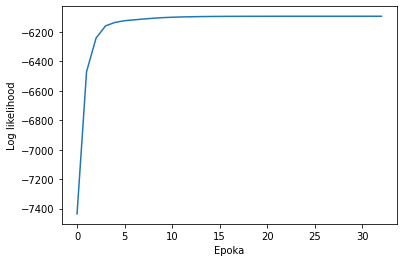

In [46]:
k = 2
n_dims = X_train.shape[1]
model = GaussianMixtureModel(n_components = k, n_dims = n_dims)
model.fit(X_train)

In [52]:
y_pred_probs = model.predict(X_test.astype(np.float32)).numpy()
y_pred = np.argmax(y_pred_probs, axis=1)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        99
           1       0.50      0.51      0.50        55

    accuracy                           0.64       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.64      0.64      0.64       154

